In [179]:
import os
import numpy as np
import pandas as pd
from sklearn import tree, metrics
from sklearn import model_selection
from sklearn.model_selection import train_test_split 
import graphviz


data = pd.read_excel('cosc_GA2.xlsx', sep='|',names =['age','income','student','credit_rating','buys_computer'] , encoding='latin-1')
data.head()

,age,income,student,credit_rating,buys_computer
0,<=30,high,no,fair,no
1,<=30,high,no,excellent,no
2,31…40,high,no,fair,yes
3,>40,medium,no,fair,yes
4,>40,low,yes,fair,yes


In [180]:
data['age'],class_names = pd.factorize(data['age'])
print(class_names)
print(data['age'].unique())

Index(['<=30', '31…40', '>40'], dtype='object')
[0 1 2]


In [181]:
data['income'],_ = pd.factorize(data['income'])
data['student'],_ = pd.factorize(data['student'])
data['credit_rating'],_ = pd.factorize(data['credit_rating'])
data['buys_computer'],_ = pd.factorize(data['buys_computer'])
data.head()

,age,income,student,credit_rating,buys_computer
0,0,0,0,0,0
1,0,0,0,1,0
2,1,0,0,0,1
3,2,1,0,0,1
4,2,2,1,0,1


In [182]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
age              14 non-null int64
income           14 non-null int64
student          14 non-null int64
credit_rating    14 non-null int64
buys_computer    14 non-null int64
dtypes: int64(5)
memory usage: 640.0 bytes


In [199]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [200]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x,y, test_size=0.2, random_state=0)

In [201]:
dtree = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)
dtree.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [202]:
y_pred = dtree.predict(x_test)
count_misclassified = (y_test != y_pred).sum()
print('Misclassified sampled: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test,y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified sampled: 0
Accuracy: 1.00


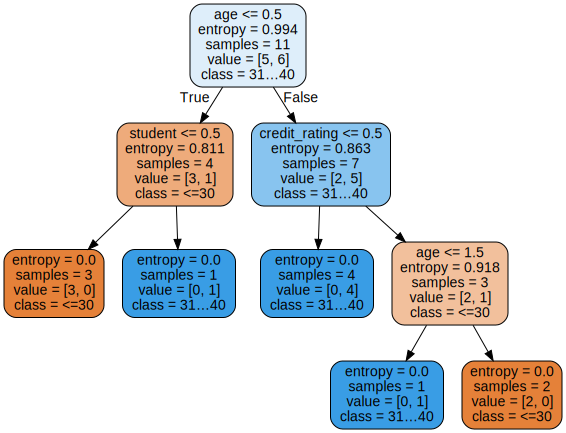

In [203]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'

feature_names = x.columns
dot_data = tree.export_graphviz(dtree, out_file = None, filled=True, rounded=True,
                               feature_names=feature_names,
                               class_names=class_names)
graph = graphviz.Source(dot_data)
graph